#**Machine Learning: Predicting NBFI Loan Defaults**
#Data Wrangling: Cleansing and Feature Selection



# IMPORTS AND SETUP

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
train_df = pd.read_csv('/content/drive/MyDrive/Machine learning dataset/loan default classification/Train_Dataset.csv')
prediction_df = pd.read_csv('/content/drive/MyDrive/Machine learning dataset/loan default classification/Test_Dataset.csv')

train_df.head()

<ipython-input-2-d17d2a5dbae5>:1: DtypeWarning: Columns (1,7,8,16,17,18,19,20,35) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('/content/drive/MyDrive/Machine learning dataset/loan default classification/Train_Dataset.csv')
<ipython-input-2-d17d2a5dbae5>:2: DtypeWarning: Columns (7,8,16,17,18,19,20,34,35) have mixed types. Specify dtype option on import or set low_memory=False.
  prediction_df = pd.read_csv('/content/drive/MyDrive/Machine learning dataset/loan default classification/Test_Dataset.csv')


,ID,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,...,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,Default
0,12142509,6750,0.0,0.0,1.0,0.0,0.0,61190.55,3416.85,Alone,...,Yes,Yes,Self-employed,0.568066,0.478787,NaN,0.0186,63.0,NaN,0
1,12138936,20250,1.0,0.0,1.0,NaN,0.0,15282,1826.55,Alone,...,Yes,Yes,Government,0.563360,0.215068,NaN,NaN,NaN,NaN,0
2,12181264,18000,0.0,0.0,1.0,0.0,1.0,59527.35,2788.2,Alone,...,Yes,Yes,Self-employed,NaN,0.552795,0.329655,0.0742,277.0,0.0,0
3,12188929,15750,0.0,0.0,1.0,1.0,0.0,53870.4,2295.45,Alone,...,Yes,Yes,XNA,NaN,0.135182,0.631355,NaN,1700.0,3.0,0
4,12133385,33750,1.0,0.0,1.0,0.0,2.0,133988.4,3547.35,Alone,...,Yes,Yes,Business Entity Type 3,0.508199,0.301182,0.355639,0.2021,674.0,1.0,0


In [ ]:
train_df.describe(include=[object])

,Client_Income,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Population_Region_Relative,Age_Days,Employed_Days,Registration_Days,ID_Days,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization,Score_Source_3
count,118249,118224.0,117044,120110,118155,118211,118383,119443,118205,118169,116999,118256,118207,118242,115888,80421,121856,121856,118247,94935.0000
unique,1516,6816.0,16680,7,8,5,4,3,2,6,164,22583,13220,19254,9655,18,2,2,58,1430.0000
top,13500,45000.0,900,Alone,Service,Secondary,M,Male,CL,Home,0.035792,13740,365243,1,4053,Laborers,Yes,Yes,Business Entity Type 3,0.7463
freq,11908,2513.0,1885,97409,61028,83911,87349,78463,107118,104870,4159,20,19848,44,73,21024,112454,100015,26279,484.0000


In [ ]:
train_df['Client_Income_Type'].value_counts()

Service            61028
Commercial         27764
Retired            21043
Govt Job            8303
Student                8
Unemployed             6
Maternity leave        2
Businessman            1
Name: Client_Income_Type, dtype: int64

#Dealing with wrong columns types

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121856 entries, 0 to 121855
Data columns (total 40 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ID                          121856 non-null  int64  
 1   Client_Income               118249 non-null  object 
 2   Car_Owned                   118275 non-null  float64
 3   Bike_Owned                  118232 non-null  float64
 4   Active_Loan                 118221 non-null  float64
 5   House_Own                   118195 non-null  float64
 6   Child_Count                 118218 non-null  float64
 7   Credit_Amount               118224 non-null  object 
 8   Loan_Annuity                117044 non-null  object 
 9   Accompany_Client            120110 non-null  object 
 10  Client_Income_Type          118155 non-null  object 
 11  Client_Education            118211 non-null  object 
 12  Client_Marital_Status       118383 non-null  object 
 13  Client_Gender 

In [4]:
numeric_col =  train_df.select_dtypes(exclude=["object","category"]).columns

categorical_col = train_df.select_dtypes(exclude=["int64","float64"]).columns
print(f'numerical columns:{numeric_col}\n'), print(f'categorical columns: {categorical_col}')

numerical columns:Index(['ID', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Own_House_Age', 'Mobile_Tag', 'Homephone_Tag',
       'Workphone_Working', 'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour', 'Score_Source_1',
       'Score_Source_2', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau', 'Default'],
      dtype='object')

categorical columns: Index(['Client_Income', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_3'],
      dtype='object')


(None, None)

the 

In [5]:
invalid =['$', 'XAN',"#VALUE!", 'x', '&', '#', '@']

# Converting the columns to Numeric DType as required
train_df.Client_Income.replace(invalid, np.nan, inplace = True)
train_df.Client_Income = pd.to_numeric(train_df.Client_Income)

train_df.Credit_Amount.replace(invalid, np.nan, inplace = True)
train_df.Credit_Amount = pd.to_numeric(train_df.Credit_Amount)

train_df.Loan_Annuity.replace(invalid, np.nan, inplace = True)
train_df.Loan_Annuity = pd.to_numeric(train_df.Loan_Annuity)

train_df.Score_Source_3.replace(invalid, np.nan, inplace = True)
train_df.Score_Source_3 = pd.to_numeric(train_df.Score_Source_3)

train_df.Age_Days.replace(invalid, np.nan, inplace = True)
train_df.Age_Days = pd.to_numeric(train_df.Age_Days)

train_df.Employed_Days.replace(invalid, np.nan, inplace = True)
train_df.Employed_Days = pd.to_numeric(train_df.Employed_Days)

train_df.Registration_Days.replace(invalid, np.nan, inplace = True)
train_df.Registration_Days = pd.to_numeric(train_df.Registration_Days)

train_df.ID_Days.replace(invalid, np.nan, inplace = True)
train_df.ID_Days = pd.to_numeric(train_df.ID_Days)



we are going to use the population_relative_tag to create a new column.
The new column value will be 1 for a densely populated area and 0 for a less populated one 

In [6]:
#convert the column to numeric 
train_df.Population_Region_Relative.replace(invalid, np.nan, inplace = True)
train_df.Population_Region_Relative = pd.to_numeric(train_df.Population_Region_Relative)

#calculate the mean 
mean_prr = train_df['Population_Region_Relative'].mean()
# populating the column
train_df.loc[train_df['Population_Region_Relative'] < mean_prr, 'Population_Region_Relative' ] = 0 
train_df.loc[train_df['Population_Region_Relative'] >= mean_prr, 'Population_Region_Relative' ] = 1 

train_df['Population_Region_Relative'].head()

0    1.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Population_Region_Relative, dtype: float64

#Dealing with missing values

In [7]:
missing = train_df.isna().sum().to_frame().rename(columns={0:'Missing values'}).sort_values(
    by = 'Missing values',
    ascending =False)

missing['percent'] = (missing.apply(lambda x: x/x.sum()*100).round(2))

missing

,Missing values,percent
Own_House_Age,80095,20.23
Score_Source_1,68835,17.39
Social_Circle_Default,61928,15.64
Client_Occupation,41435,10.47
Score_Source_3,26922,6.80
Credit_Bureau,18540,4.68
ID_Days,5985,1.51
Score_Source_2,5686,1.44
Population_Region_Relative,4868,1.23
Loan_Annuity,4826,1.22


In [8]:
train_df.drop('ID',axis=1, inplace=True)
train_df.shape

(121856, 39)

In [9]:
from sklearn.impute import SimpleImputer

si_mean = SimpleImputer(strategy="mean", missing_values=np.nan)
si_mode = SimpleImputer(strategy="most_frequent", missing_values=np.nan)

We are going to use two method to replace missing values

* **mode** on categorical and binary columns, here the missing values will be replaced by the value that occurs the most freauently in the column

* **mean** on numerical columns that tends to represent an amount of something, or a score 

In [10]:
mode_col = ['Car_Owned', 'Bike_Owned','House_Own','Active_Loan',
       'Child_Count',
       'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',

       'Population_Region_Relative','Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour','Own_House_Age',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization',
       'Credit_Bureau'
       ]


mean_col = ['Client_Income','Credit_Amount','Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', ]


rounded_mean_col = ['Loan_Annuity','Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days','Phone_Change']

In [11]:

train_df.loc[:, mode_col] = si_mode.fit_transform(train_df.loc[:, mode_col])

train_df.loc[:, mean_col] = si_mean.fit_transform(train_df.loc[:, mean_col])

train_df.loc[:, rounded_mean_col] = np.round(
    #calculate the mean, round it then replace the missing values by the rounded mean
    si_mode.fit_transform(train_df.loc[:, rounded_mean_col])
    )




In [12]:
missing = train_df.isna().sum().to_frame().rename(columns={0:'Missing values'}).sort_values(
    by = 'Missing values',
    ascending =False)

missing['percent'] = (missing.apply(lambda x: x/x.sum()*100).round(2))

missing

,Missing values,percent
Client_Income,0,NaN
Client_Permanent_Match_Tag,0,NaN
Homephone_Tag,0,NaN
Workphone_Working,0,NaN
Client_Occupation,0,NaN
Client_Family_Members,0,NaN
Cleint_City_Rating,0,NaN
Application_Process_Day,0,NaN
Application_Process_Hour,0,NaN
Client_Contact_Work_Tag,0,NaN


**Great!!!** No more pesky missing values 

#Categorical Columns encoding 

In [13]:
#this are the categorical columns
categorical_col = train_df.select_dtypes(exclude=["int64","float64"]).columns
categorical_col

Index(['Accompany_Client', 'Client_Income_Type', 'Client_Education',
       'Client_Marital_Status', 'Client_Gender', 'Loan_Contract_Type',
       'Client_Housing_Type', 'Client_Occupation',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization'],
      dtype='object')

In [ ]:
df_test = train_df[categorical_col].copy()
df_test.head()

,Accompany_Client,Client_Income_Type,Client_Education,Client_Marital_Status,Client_Gender,Loan_Contract_Type,Client_Housing_Type,Client_Occupation,Client_Permanent_Match_Tag,Client_Contact_Work_Tag,Type_Organization
0,Alone,Commercial,Secondary,M,Male,CL,Home,Sales,Yes,Yes,Self-employed
1,Alone,Service,Graduation,M,Male,CL,Home,Laborers,Yes,Yes,Government
2,Alone,Service,Graduation dropout,W,Male,CL,Family,Realty agents,Yes,Yes,Self-employed
3,Alone,Retired,Secondary,M,Male,CL,Home,Laborers,Yes,Yes,XNA
4,Alone,Commercial,Secondary,M,Female,CL,Home,Laborers,Yes,Yes,Business Entity Type 3


In [14]:
from sklearn.preprocessing import LabelEncoder

cols = ["Accompany_Client", "Client_Marital_Status", "Client_Income_Type", "Client_Education", "Client_Gender", "Loan_Contract_Type", "Client_Housing_Type", "Client_Occupation", "Client_Permanent_Match_Tag", "Client_Contact_Work_Tag", "Type_Organization"]
train_df[cols] =train_df[cols].apply(LabelEncoder().fit_transform)

In [15]:
train_df.shape
#train_df = pd.get_dummies(train_df, columns= categorical_col,
                         # prefix=categorical_col, 
                          #prefix_sep='_')

(121856, 39)

#Training and testing DATASET

we will split the train_df dataset into training and validation datasets then we will use the model we have built to predict the default on the test dataset 

In [16]:
# train_df is the training features dataset

X = train_df.copy()
y = X.pop('Default')

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)


#Models



## RandomForestClassifier
Our first model will be based on Random Forest classifier. Read more [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)

In [17]:
%%time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

CPU times: user 37.1 s, sys: 49.7 ms, total: 37.1 s
Wall time: 39.5 s


RandomForestClassifier()

In [18]:
y_test_preds= clf.predict(X_test) #run our model using X_test dataset
#calculate the model accuracy using actual y_test labels and our predicted y
acc = accuracy_score(y_test,y_test_preds) * 100
acc

92.6842278023962

Our model 's accuracy score is over 93% on the test data. That seems pretty impressive, but  accuracy is not a great measure of classifier performance when the classes are imbalanced. We need more information to understand how well the model really performed. Did it perform equally well for each class? Were there any pairs of classes it found especially hard to distinguish? Let’s find out with a confusion matrix.

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_preds)

array([[22334,     3],
       [ 1780,   255]])

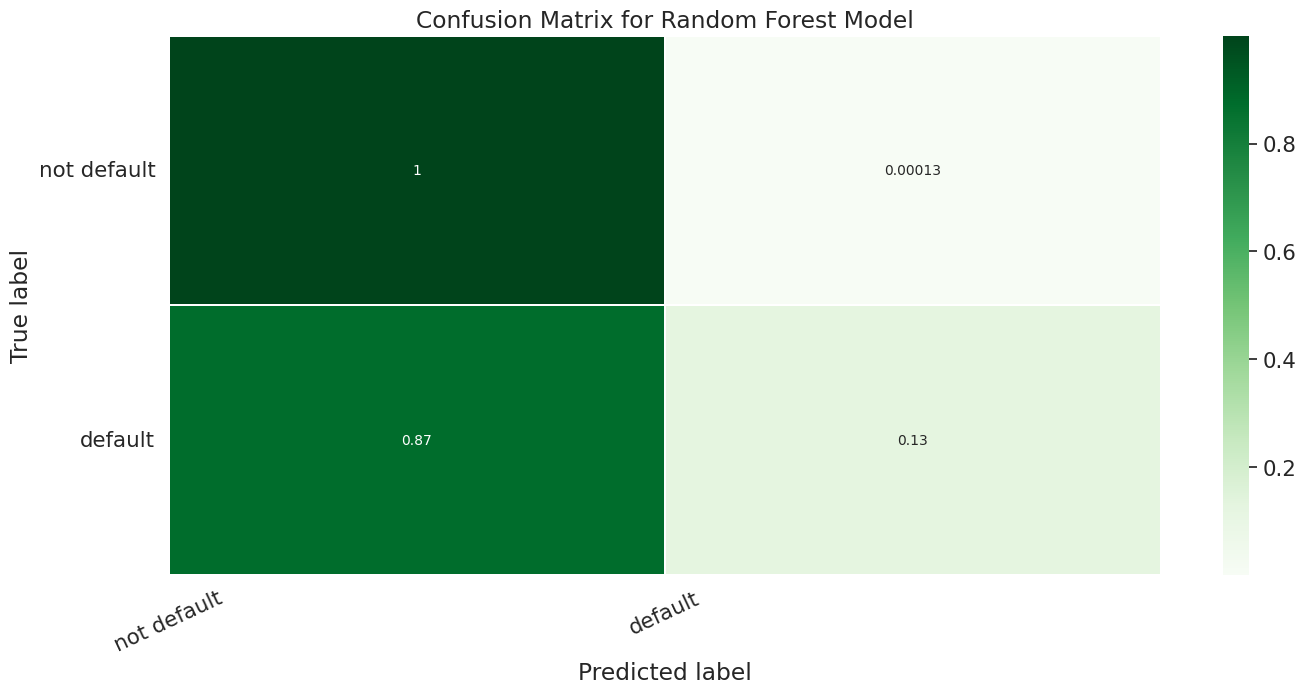

In [20]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_test_preds)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['not default','default']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, 
           class_names, 
           rotation=25)
plt.yticks(tick_marks2, 
           class_names, 
           rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

Our model seems to have trouble to predict default class.
Ze see that in over 80% of cases, it predicted the client would default when it 
actual fact, they did not.

###Classification report
To get even more insight into model performance, we should examine other metrics like precision, recall, and F1 score.

* **Precision** is the number of correctly-identified members of a class divided by all the times the model predicted that class. In the case of Default, the precision score would be the number of correctly-identified Default divided by the total number of times the classifier predicted “Default,” rightly or wrongly.

* **Recall** is the number of members of a class that the classifier identified correctly divided by the total number of members in that class. For default, this would be the number of actual default that the classifier correctly identified as such.

* **F1 score** is a little less intuitive because it combines precision and recall into one metric. If precision and recall are both high, F1 will be high, too. If they are both low, F1 will be low. If one is high and the other low, F1 will be low. F1 is a quick way to tell whether the classifier is actually good at identifying members of a class, or if it is finding shortcuts (e.g., just identifying everything as a member of a large class).

In [21]:
# View the classification report for test data and predictions
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_preds))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     22337
           1       0.99      0.13      0.22      2035

    accuracy                           0.93     24372
   macro avg       0.96      0.56      0.59     24372
weighted avg       0.93      0.93      0.90     24372



Precision is high for 'default(1)', meaning that the model was careful to avoid labeling things “default(1)” that aren’t default. On the other hand, recall is very low, which means that the classifier is missing a lot of default because it is being too careful! The F1 score reflects this imbalance.

##Logistic regression

Our second model will be based on a logistic regression 

In [36]:


# Normalizing the train and test data
from sklearn.preprocessing import MinMaxScaler

scaler_lr = MinMaxScaler()
features = X_train.columns # features contains all the features
log_X_train = scaler_lr.fit_transform(X_train) #apply scaler on the training dataset 

log_X_train = pd.DataFrame(log_X_train, columns = features)#put the result into a df

log_X_test = scaler_lr.transform(X_test)#apply scaler on the testing dataset 
log_X_test = pd.DataFrame(log_X_test, columns = features)#put the result into a df

In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log_model = LogisticRegression(max_iter = 10000, solver = 'lbfgs', 
                              random_state = 1, 
                              class_weight = 'balanced' )
#The data matrix for which we want to get the confidence scores.
parameters = {'C':[0.001, 0.01, 0.1, 1, 10, 100]}

#Exhaustive search over specified parameter values for an estimator.
clf_log = log_model.fit(log_X_train, y_train)

In [38]:
y_test_preds_log = clf_log.predict_proba(log_X_test)[:,1]

In [39]:
y_test_preds_log2 = clf_log.predict(log_X_test)#[:,1]
y_test_preds_log2

array([0, 1, 1, ..., 0, 0, 1])

In [40]:

acc = clf_log.score(X_test, y_test)
acc

0.9165025439028394

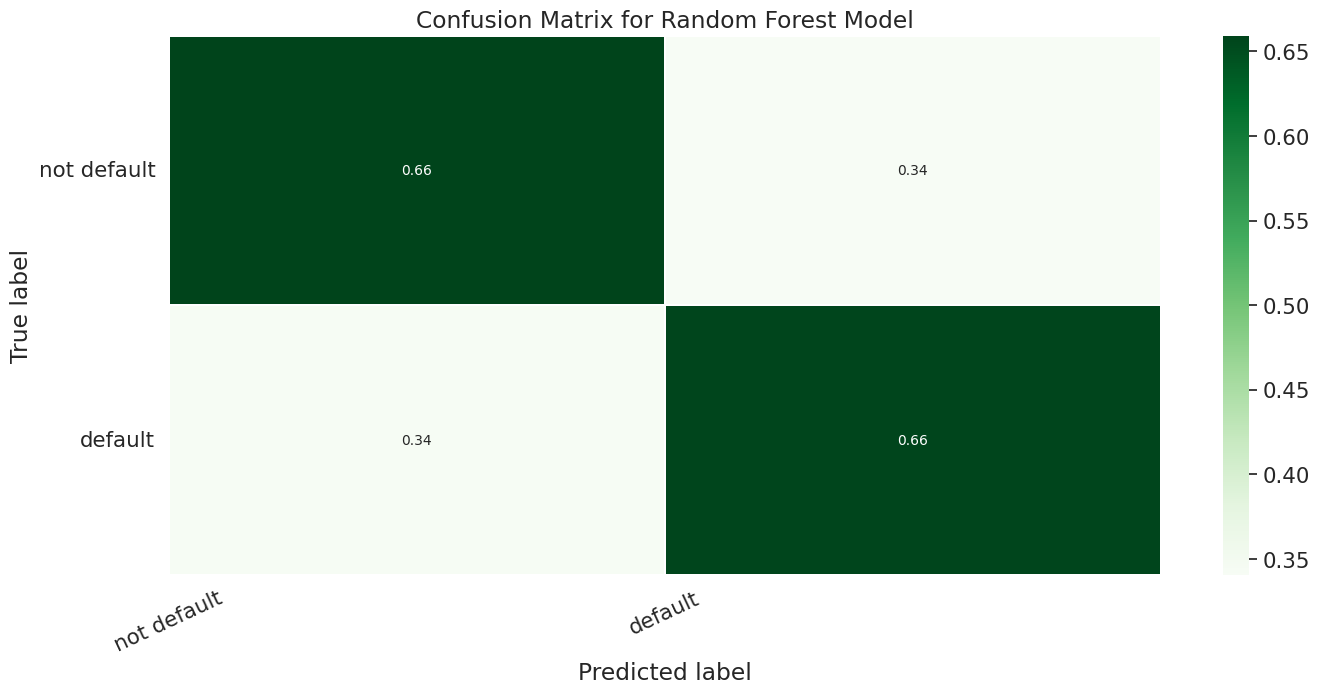

In [41]:
matrix = confusion_matrix(y_test, y_test_preds_log2)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]
# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['not default','default']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, 
           class_names, 
           rotation=25)
plt.yticks(tick_marks2, 
           class_names, 
           rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

#Testing Predictions

##Preprocessing and cleaning the prediction dataset

In [22]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80900 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80900 non-null  int64  
 1   Client_Income               78466 non-null  object 
 2   Car_Owned                   78495 non-null  float64
 3   Bike_Owned                  78414 non-null  float64
 4   Active_Loan                 78446 non-null  float64
 5   House_Own                   78553 non-null  float64
 6   Child_Count                 78572 non-null  float64
 7   Credit_Amount               78613 non-null  object 
 8   Loan_Annuity                77697 non-null  object 
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78399 non-null  object 
 11  Client_Education            78550 non-null  object 
 12  Client_Marital_Status       78457 non-null  object 
 13  Client_Gender               792

dealing with wrong column types

In [42]:
numeric_col = prediction_df.select_dtypes(exclude=["object","category"]).columns

categorical_col = prediction_df.select_dtypes(exclude=["int64","float64"]).columns
print(f'numerical columns:{numeric_col}\n'), print(f'categorical columns: {categorical_col}')

numerical columns:Index(['Client_Income', 'Car_Owned', 'Bike_Owned', 'Active_Loan', 'House_Own',
       'Child_Count', 'Credit_Amount', 'Loan_Annuity', 'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',
       'Population_Region_Relative', 'Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days', 'Own_House_Age', 'Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization', 'Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', 'Phone_Change',
       'Credit_Bureau'],
      dtype='object')

categorical columns: Index([], dtype='object')


(None, None)

In [43]:
invalid =['$', 'XAN',"#VALUE!", 'x', '&', '#', '@']

# Converting the columns to Numeric DType as required
prediction_df.Client_Income.replace(invalid, np.nan, inplace = True)
prediction_df.Client_Income = pd.to_numeric(prediction_df.Client_Income)

prediction_df.Credit_Amount.replace(invalid, np.nan, inplace = True)
prediction_df.Credit_Amount = pd.to_numeric(prediction_df.Credit_Amount)

prediction_df.Loan_Annuity.replace(invalid, np.nan, inplace = True)
prediction_df.Loan_Annuity = pd.to_numeric(prediction_df.Loan_Annuity)

prediction_df.Score_Source_3.replace(invalid, np.nan, inplace = True)
prediction_df.Score_Source_3 = pd.to_numeric(prediction_df.Score_Source_3)

prediction_df.Score_Source_2.replace(invalid, np.nan, inplace = True)
prediction_df.Score_Source_2 = pd.to_numeric(prediction_df.Score_Source_2)

prediction_df.Age_Days.replace(invalid, np.nan, inplace = True)
prediction_df.Age_Days = pd.to_numeric(prediction_df.Age_Days)

prediction_df.Employed_Days.replace(invalid, np.nan, inplace = True)
prediction_df.Employed_Days = pd.to_numeric(prediction_df.Employed_Days)

prediction_df.Registration_Days.replace(invalid, np.nan, inplace = True)
prediction_df.Registration_Days = pd.to_numeric(prediction_df.Registration_Days)

prediction_df.ID_Days.replace(invalid, np.nan, inplace = True)
prediction_df.ID_Days = pd.to_numeric(prediction_df.ID_Days)

In [44]:
#convert the column to numeric 
prediction_df.Population_Region_Relative.replace(invalid, np.nan, inplace = True)
prediction_df.Population_Region_Relative = pd.to_numeric(prediction_df.Population_Region_Relative)

#calculate the mean 
mean_prr = prediction_df['Population_Region_Relative'].mean()
# populating the column
prediction_df.loc[prediction_df['Population_Region_Relative'] < mean_prr, 'Population_Region_Relative' ] = 0 
prediction_df.loc[prediction_df['Population_Region_Relative'] >= mean_prr, 'Population_Region_Relative' ] = 1 

prediction_df['Population_Region_Relative'].head()

0    0.0
1    0.0
2    1.0
3    0.0
4    0.0
Name: Population_Region_Relative, dtype: float64

In [ ]:
prediction_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80899 entries, 0 to 80899
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          80899 non-null  int64  
 1   Client_Income               78448 non-null  float64
 2   Car_Owned                   78494 non-null  float64
 3   Bike_Owned                  78413 non-null  float64
 4   Active_Loan                 78445 non-null  float64
 5   House_Own                   78552 non-null  float64
 6   Child_Count                 78571 non-null  float64
 7   Credit_Amount               78608 non-null  float64
 8   Loan_Annuity                77691 non-null  float64
 9   Accompany_Client            79692 non-null  object 
 10  Client_Income_Type          78398 non-null  object 
 11  Client_Education            78549 non-null  object 
 12  Client_Marital_Status       78456 non-null  object 
 13  Client_Gender               792

missing values

In [45]:
missing = prediction_df.isna().sum().to_frame().rename(columns={0:'Missing values'}).sort_values(
    by = 'Missing values',
    ascending =False)

missing['percent'] = (missing.apply(lambda x: x/x.sum()*100).round(2))

missing

,Missing values,percent
Client_Income,0,NaN
Application_Process_Hour,0,NaN
Mobile_Tag,0,NaN
Homephone_Tag,0,NaN
Workphone_Working,0,NaN
Client_Occupation,0,NaN
Client_Family_Members,0,NaN
Cleint_City_Rating,0,NaN
Application_Process_Day,0,NaN
Client_Permanent_Match_Tag,0,NaN


In [46]:
prediction_df.drop('ID',axis=1, inplace=True)
prediction_df.shape

KeyError: ignored

The client_marital_status in the prediction dataset includes a row with value 'Unknown', we will drop that row

In [47]:
prediction_df.shape

(80900, 38)

In [48]:
prediction_df.drop(prediction_df[prediction_df['Client_Marital_Status'] == 'Unknown'].index, inplace = True)
prediction_df.shape

(80900, 38)

In [49]:
from sklearn.impute import SimpleImputer

si_mean = SimpleImputer(strategy="mean", missing_values=np.nan)
si_mode = SimpleImputer(strategy="most_frequent", missing_values=np.nan)

In [50]:
mode_col = ['Car_Owned', 'Bike_Owned','House_Own','Active_Loan',
       'Child_Count',
       'Accompany_Client',
       'Client_Income_Type', 'Client_Education', 'Client_Marital_Status',
       'Client_Gender', 'Loan_Contract_Type', 'Client_Housing_Type',

       'Population_Region_Relative','Mobile_Tag',
       'Homephone_Tag', 'Workphone_Working', 'Client_Occupation',
       'Client_Family_Members', 'Cleint_City_Rating',
       'Application_Process_Day', 'Application_Process_Hour','Own_House_Age',
       'Client_Permanent_Match_Tag', 'Client_Contact_Work_Tag',
       'Type_Organization',
       'Credit_Bureau'
       ]


mean_col = ['Client_Income','Credit_Amount','Score_Source_1', 'Score_Source_2',
       'Score_Source_3', 'Social_Circle_Default', ]


rounded_mean_col = ['Loan_Annuity','Age_Days', 'Employed_Days',
       'Registration_Days', 'ID_Days','Phone_Change']

In [51]:
prediction_df.loc[:, mode_col] = si_mode.fit_transform(prediction_df.loc[:, mode_col])

prediction_df.loc[:, mean_col] = si_mean.fit_transform(prediction_df.loc[:, mean_col])

prediction_df.loc[:, rounded_mean_col] = np.round(
    #calculate the mean, round it then replace the missing values by the rounded mean
    si_mode.fit_transform(prediction_df.loc[:, rounded_mean_col])
    )

In [52]:
missing = prediction_df.isna().sum().to_frame().rename(columns={0:'Missing values'}).sort_values(
    by = 'Missing values',
    ascending =False)

missing['percent'] = (missing.apply(lambda x: x/x.sum()*100).round(2))

missing

,Missing values,percent
Client_Income,0,NaN
Application_Process_Hour,0,NaN
Mobile_Tag,0,NaN
Homephone_Tag,0,NaN
Workphone_Working,0,NaN
Client_Occupation,0,NaN
Client_Family_Members,0,NaN
Cleint_City_Rating,0,NaN
Application_Process_Day,0,NaN
Client_Permanent_Match_Tag,0,NaN


Categorical columns encoding 

In [53]:
#this are the categorical columns
categorical_col = prediction_df.select_dtypes(exclude=["int64","float64"]).columns
categorical_col

Index([], dtype='object')

In [54]:
from sklearn.preprocessing import LabelEncoder

cols = ["Accompany_Client", "Client_Marital_Status", "Client_Income_Type", 
        "Client_Education", "Client_Gender", "Loan_Contract_Type", 
        "Client_Housing_Type", "Client_Occupation", "Client_Permanent_Match_Tag", 
        "Client_Contact_Work_Tag", "Type_Organization"]
prediction_df[cols] = prediction_df[cols].apply(LabelEncoder().fit_transform)

In [55]:
print(prediction_df.shape)
#prediction_df = pd.get_dummies(prediction_df, columns= categorical_col,
                       #   prefix=categorical_col, 
                       #   prefix_sep='_')

(80900, 38)


renaming some columns to match the features names that the models were trained with

##predicting 'default' using randomForestClassifier

In [56]:
forest_preds = clf.predict(prediction_df)
forest_preds

array([0, 0, 0, ..., 0, 0, 0])

In [60]:
preds = pd.DataFrame(forest_preds, columns=['default_rfc'])
preds

,default_rfc
0,0
1,0
2,0
3,0
4,0
...,...
80895,0
80896,0
80897,0
80898,0


##predicting default using logistic regression

In [58]:
log_preds = clf_log.predict(prediction_df)
log_preds

array([0, 0, 0, ..., 0, 0, 0])

In [62]:
prediction_df['default_log_classifier'] = log_preds
prediction_df['default_rf_classifier'] = forest_preds

In [63]:
prediction_df.head()

,Client_Income,Car_Owned,Bike_Owned,Active_Loan,House_Own,Child_Count,Credit_Amount,Loan_Annuity,Accompany_Client,Client_Income_Type,...,Client_Contact_Work_Tag,Type_Organization,Score_Source_1,Score_Source_2,Score_Source_3,Social_Circle_Default,Phone_Change,Credit_Bureau,default_log_classifier,default_rf_classifier
0,11250.0,0.0,1.0,1.0,1.0,0.0,112500.00,4475.0,6,4,...,1,42,0.501752,0.757151,0.629674,0.051500,716.0,2.0,0,0
1,13500.0,1.0,1.0,1.0,1.0,3.0,49752.00,3252.0,1,4,...,1,42,0.501752,0.342269,0.511575,0.117942,181.0,0.0,0,0
2,38250.0,0.0,1.0,0.0,1.0,0.0,67500.00,3375.0,1,1,...,1,5,0.501752,0.683665,0.511575,0.150300,281.0,0.0,0,0
3,20250.0,0.0,0.0,1.0,0.0,0.0,50849.55,3815.0,1,2,...,0,30,0.351581,0.229950,0.672243,0.117942,1442.0,4.0,0,0
4,13500.0,1.0,1.0,0.0,1.0,0.0,43603.20,2516.0,1,4,...,1,42,0.731110,0.566971,0.730987,0.117942,927.0,1.0,0,0


In [64]:
prediction_df.to_csv('loan_default_prediction.csv')